O jogo Counter Stiker Global Offencie, é um espoter de tirro em primeira pessoa, de grande sucesso durando os anos -------. Esse jogo mistura mua mescla de habilidades de tiro, possicionamento e controle de uma economia intena por round. Atualmente esse jogo está sendo chamado de CS 2, onde possue grandes melhgorias graficas, mas ainda mantendo os aspectos das informacoes encontradas nesse dataset. O arquivo compactado supera os valores maximos do GitHub e do Gitlab, descompactados eles possuem um valor 6 vezes maior do permetido da forma grastis de se utilizar. Assim deixei linkado somente aonde possemos coletas essas informacoes, [CS:GO Competitive Matchmaking Data](https://www.kaggle.com/datasets/skihikingkevin/csgo-matchmaking-damage/data 'CS:GO Competitive Matchmaking Data')

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import re

sns.set_style('whitegrid')

# Input dataframes

In [26]:
map_info_df = pd.read_csv('data/map_data.csv', index_col=0)
map_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, de_cache to de_train
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   EndX    7 non-null      int64
 1   EndY    7 non-null      int64
 2   ResX    7 non-null      int64
 3   ResY    7 non-null      int64
 4   StartX  7 non-null      int64
 5   StartY  7 non-null      int64
dtypes: int64(6)
memory usage: 392.0+ bytes


In [27]:
grenades_events_df = pd.read_csv('data/mm_grenades_demos.csv', index_col=0)
grenades_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366098 entries, 0 to 275
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   file             366098 non-null  object 
 1   map              366098 non-null  object 
 2   round            366098 non-null  int64  
 3   start_seconds    366098 non-null  float64
 4   seconds          366098 non-null  float64
 5   end_seconds      366098 non-null  float64
 6   att_team         366098 non-null  object 
 7   vic_team         59240 non-null   object 
 8   att_id           366098 non-null  int64  
 9   vic_id           59240 non-null   float64
 10  att_side         366098 non-null  object 
 11  vic_side         59240 non-null   object 
 12  hp_dmg           366098 non-null  int64  
 13  arm_dmg          366098 non-null  int64  
 14  is_bomb_planted  366098 non-null  bool   
 15  bomb_site        23107 non-null   object 
 16  hitbox           59240 non-null   object 
 17 

In [28]:
weapon_events_df = pd.read_csv('data/mm_master_demos.csv', index_col=0)
weapon_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955466 entries, 0 to 841
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   file             955466 non-null  object 
 1   map              955466 non-null  object 
 2   date             955466 non-null  object 
 3   round            955466 non-null  int64  
 4   tick             955466 non-null  int64  
 5   seconds          955466 non-null  float64
 6   att_team         955466 non-null  object 
 7   vic_team         955466 non-null  object 
 8   att_side         945474 non-null  object 
 9   vic_side         955466 non-null  object 
 10  hp_dmg           955466 non-null  int64  
 11  arm_dmg          955466 non-null  int64  
 12  is_bomb_planted  955466 non-null  bool   
 13  bomb_site        151039 non-null  object 
 14  hitbox           955466 non-null  object 
 15  wp               955466 non-null  object 
 16  wp_type          955466 non-null  object 
 17 

In [29]:
games_df_part1 = pd.read_csv('data/esea_meta_demos.part1.csv')
games_df_part2 = pd.read_csv('data/esea_meta_demos.part2.csv')

games_df = pd.concat([games_df_part1, games_df_part2])
del games_df_part1
del games_df_part2
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377629 entries, 0 to 161709
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   file           377629 non-null  object 
 1   map            377629 non-null  object 
 2   round          377629 non-null  int64  
 3   start_seconds  377589 non-null  float64
 4   end_seconds    377589 non-null  float64
 5   winner_team    377628 non-null  object 
 6   winner_side    377628 non-null  object 
 7   round_type     377629 non-null  object 
 8   ct_eq_val      377629 non-null  int64  
 9   t_eq_val       377629 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 31.7+ MB


In [30]:
kills_df_part1 = pd.read_csv('data/esea_master_kills_demos.part1.csv')
kills_df_part2 = pd.read_csv('data/esea_master_kills_demos.part2.csv')

kills_df = pd.concat([kills_df_part1, kills_df_part2])
del kills_df_part1
del kills_df_part2
kills_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2742646 entries, 0 to 1173168
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   wp               object 
 9   wp_type          object 
 10  ct_alive         int64  
 11  t_alive          int64  
 12  is_bomb_planted  bool   
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 274.6+ MB


In [31]:
damage_df_part1 = pd.read_csv('data/esea_master_dmg_demos.part1.csv')
damage_df_part2 = pd.read_csv('data/esea_master_dmg_demos.part2.csv')

damage_df = pd.concat([damage_df_part1, damage_df_part2])
del damage_df_part1
del damage_df_part2
damage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10538182 entries, 0 to 4546084
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   hp_dmg           int64  
 9   arm_dmg          int64  
 10  is_bomb_planted  bool   
 11  bomb_site        object 
 12  hitbox           object 
 13  wp               object 
 14  wp_type          object 
 15  att_id           int64  
 16  att_rank         int64  
 17  vic_id           int64  
 18  vic_rank         int64  
 19  att_pos_x        float64
 20  att_pos_y        float64
 21  vic_pos_x        float64
 22  vic_pos_y        float64
dtypes: bool(1), float64(5), int64(8), object(9)
memory usage: 1.8+ GB


In [32]:
grenades_df_part1 = pd.read_csv('data/esea_master_grenades_demos.part1.csv')
grenades_df_part2 = pd.read_csv('data/esea_master_grenades_demos.part2.csv')

grenades_df = pd.concat([grenades_df_part1, grenades_df_part2])
del grenades_df_part1
del grenades_df_part2
grenades_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5246458 entries, 0 to 2256397
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   seconds          float64
 3   att_team         object 
 4   vic_team         object 
 5   att_id           int64  
 6   vic_id           float64
 7   att_side         object 
 8   vic_side         object 
 9   hp_dmg           int64  
 10  arm_dmg          int64  
 11  is_bomb_planted  bool   
 12  bomb_site        object 
 13  hitbox           object 
 14  nade             object 
 15  att_rank         int64  
 16  vic_rank         float64
 17  att_pos_x        float64
 18  att_pos_y        float64
 19  nade_land_x      float64
 20  nade_land_y      float64
 21  vic_pos_x        float64
 22  vic_pos_y        float64
dtypes: bool(1), float64(9), int64(5), object(8)
memory usage: 925.6+ MB


Sou um jogador iniciando do CS 2, mas sempre escuto tanto narradores de jogos profissionais ou colegas de jogo dizendo que cada mapa possue uma vantagem para cada um dos lados. Nessa primeira analise, quero analisar se existe essa tendencia de cada lado ou se é simplesmente uma supersticao dos jogadores.

Na primeira imagem abaixo vemos que os jogadores possuem uma preferencia dos mapas Mirage, Cache e Inferno. A partir do mapa Overpass não poderemos afirmar nada, pois possuem uma amostra muito baixa em comparacão com os outros. 

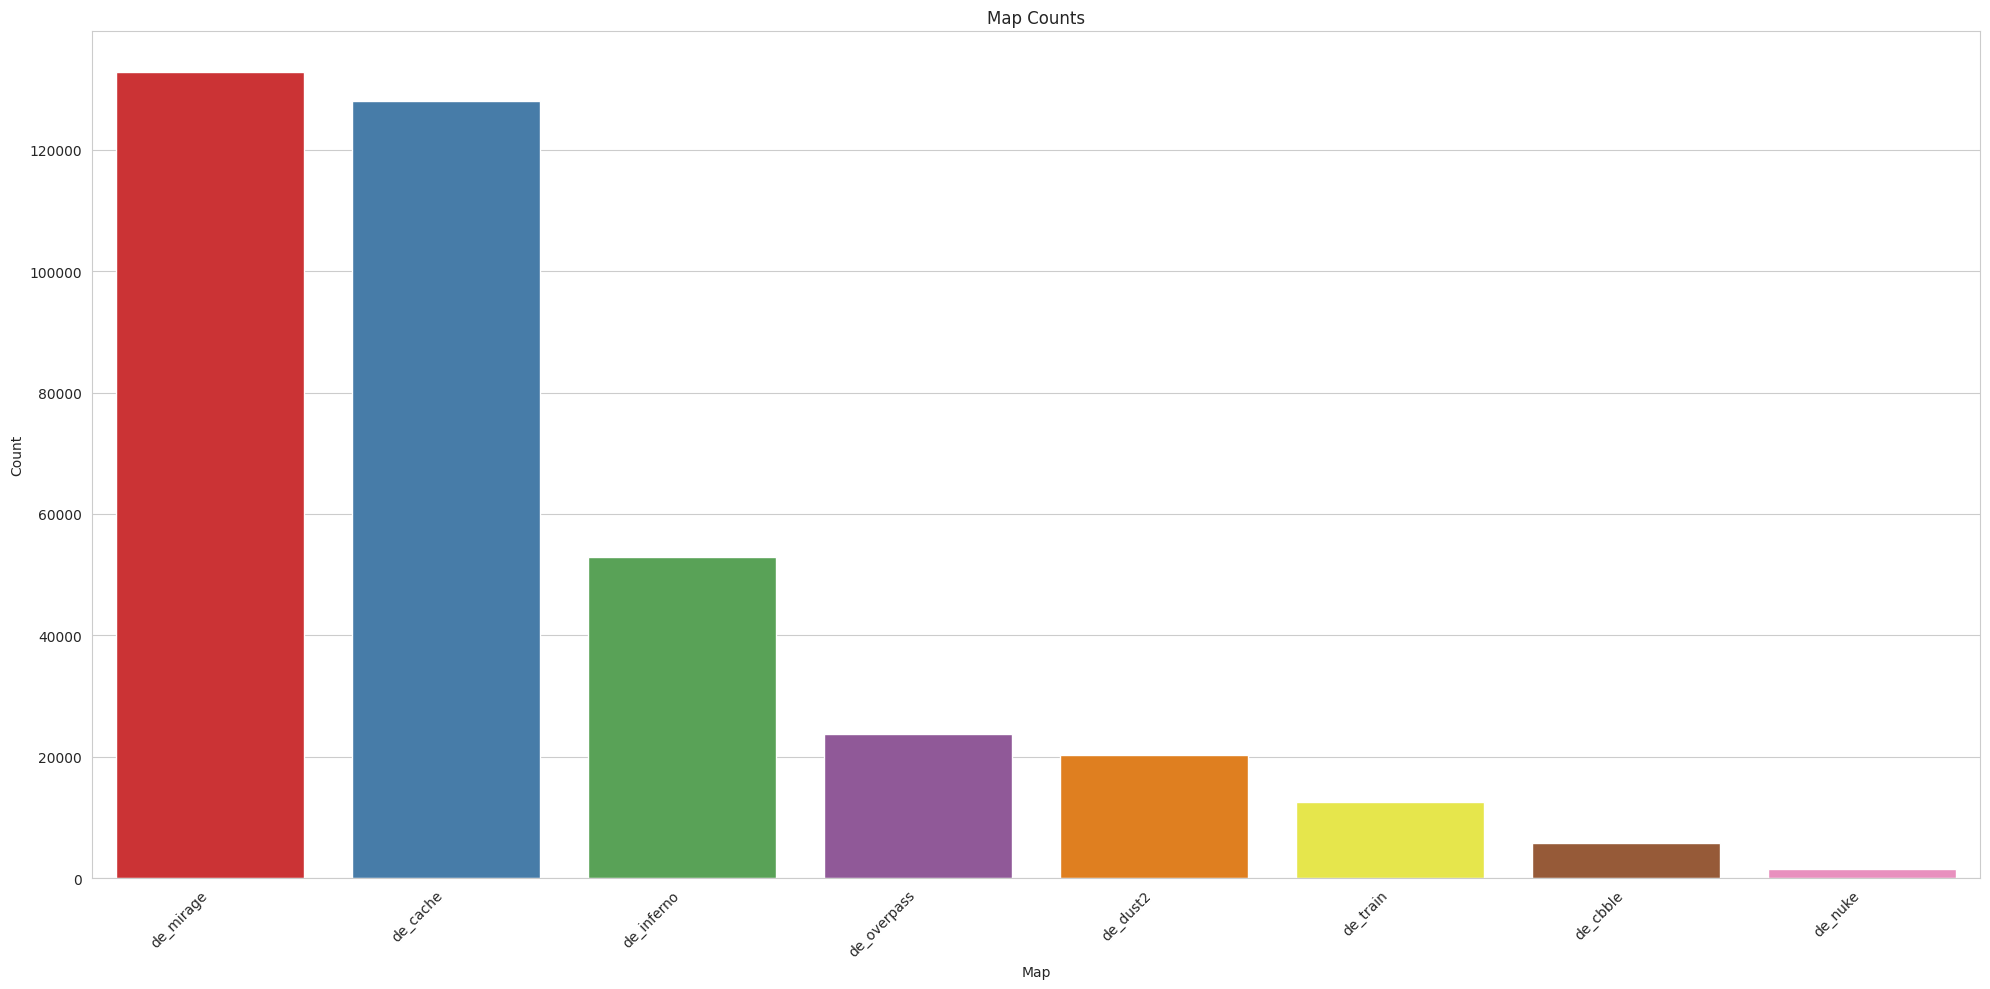

In [46]:
# Calculate value counts
mm_master = games_df['map'].value_counts()

# Set seaborn style
sns.set_style("whitegrid")

# Create bar plot using seaborn
plt.figure(figsize=(20, 10))  # Set figure size
sns.barplot(x=mm_master.index, y=mm_master, hue=mm_master.index, palette="Set1", legend=False)

# Add title and axis labels
plt.title('Map Counts')
plt.xlabel('Map')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to avoid text clipping
plt.show()

O grafico abaixo demonstra a porcentagem, por lado de em cada mapa. Onde nos dois mapas mais jogados, não temos uma grande preferencia por vitoraias de qualquer um dos lados, onde no mapda Cache e inforno temos uma vitoria aproximada de  2% para os terroistas. O resultado mais vantajkoso para um dos lados é no mapa Nuke, onde os CT possuem uma vantagem de 5%, mas isso pode ser devido a uma baixa amostragem de jogos, como comentada na imagem anterior (tendo somente 1% de jogados em comparação com o mapa mais jogado MIrage).

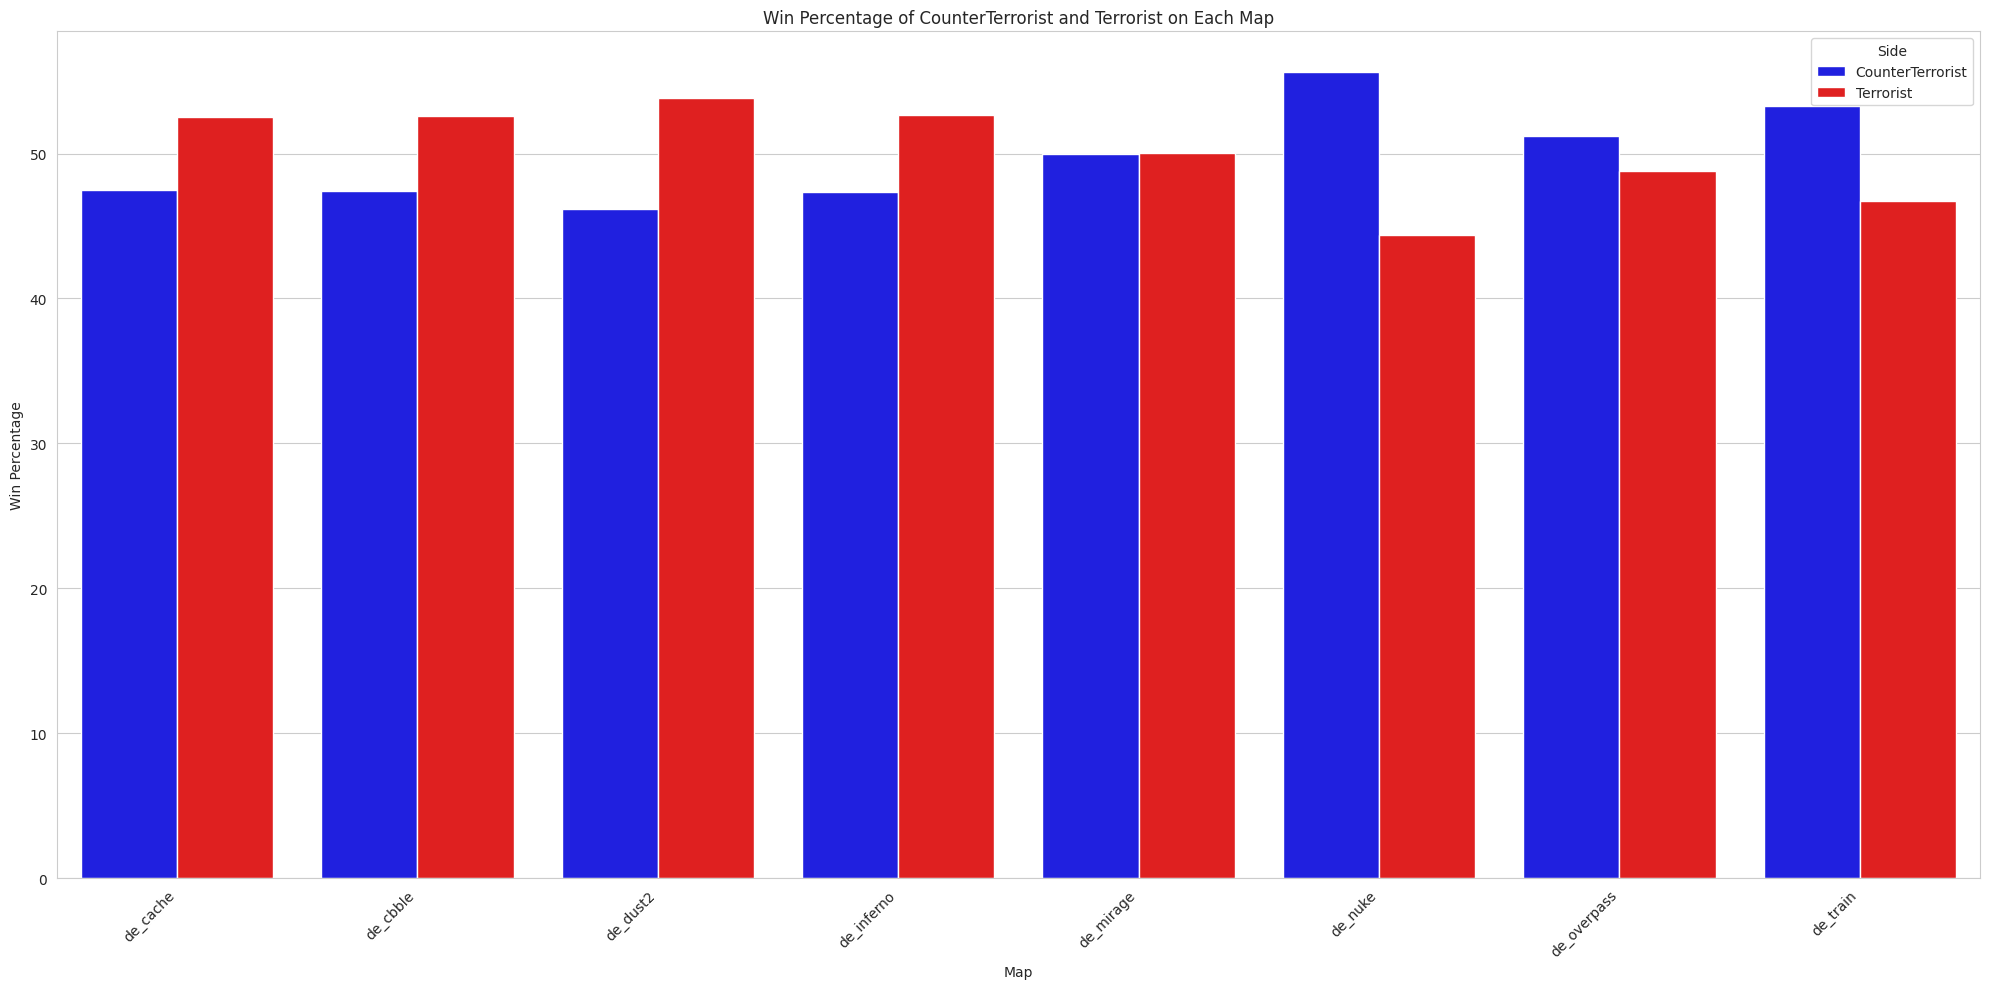

In [47]:
# Counting the number of wins of each side on each map
win_counts = games_df.groupby(['map', 'winner_side']).size().unstack(fill_value=0)

# Calculating the win percentage for each side on each map
win_percentages = win_counts.div(win_counts.sum(axis=1), axis=0) * 100

# Mapping colors for CounterTerrorist and Terrorist
colors = {'CounterTerrorist': 'blue', 'Terrorist': 'red'}

# Reshaping the data for seaborn
win_percentages.reset_index(inplace=True)
win_percentages_melted = win_percentages.melt(id_vars='map', var_name='Side', value_name='Win Percentage')

# Creating the bar chart using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(data=win_percentages_melted, x='map', y='Win Percentage', hue='Side', palette=colors)

# Adding title and axis labels
plt.title('Win Percentage of CounterTerrorist and Terrorist on Each Map')
plt.xlabel('Map')
plt.ylabel('Win Percentage')

# Displaying the chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

COmo comentado anterior mente, os rounds são compostos por um lado querendo plantar a bomba e outro defenrendo, com 5 jogadores para cada lado. Cada morte representa uma vantagem tanto financeria, quanto para alcançar o objetivo de plantar ou defusar a bomba. 
O grafico abaixo apresenta a distribuição de mortes por segundo. Olhando o histograma abaixo, claramente temos alguns outliners nos dados. Plotando um bloxplot, podemos localizar mais facil esses pontos.

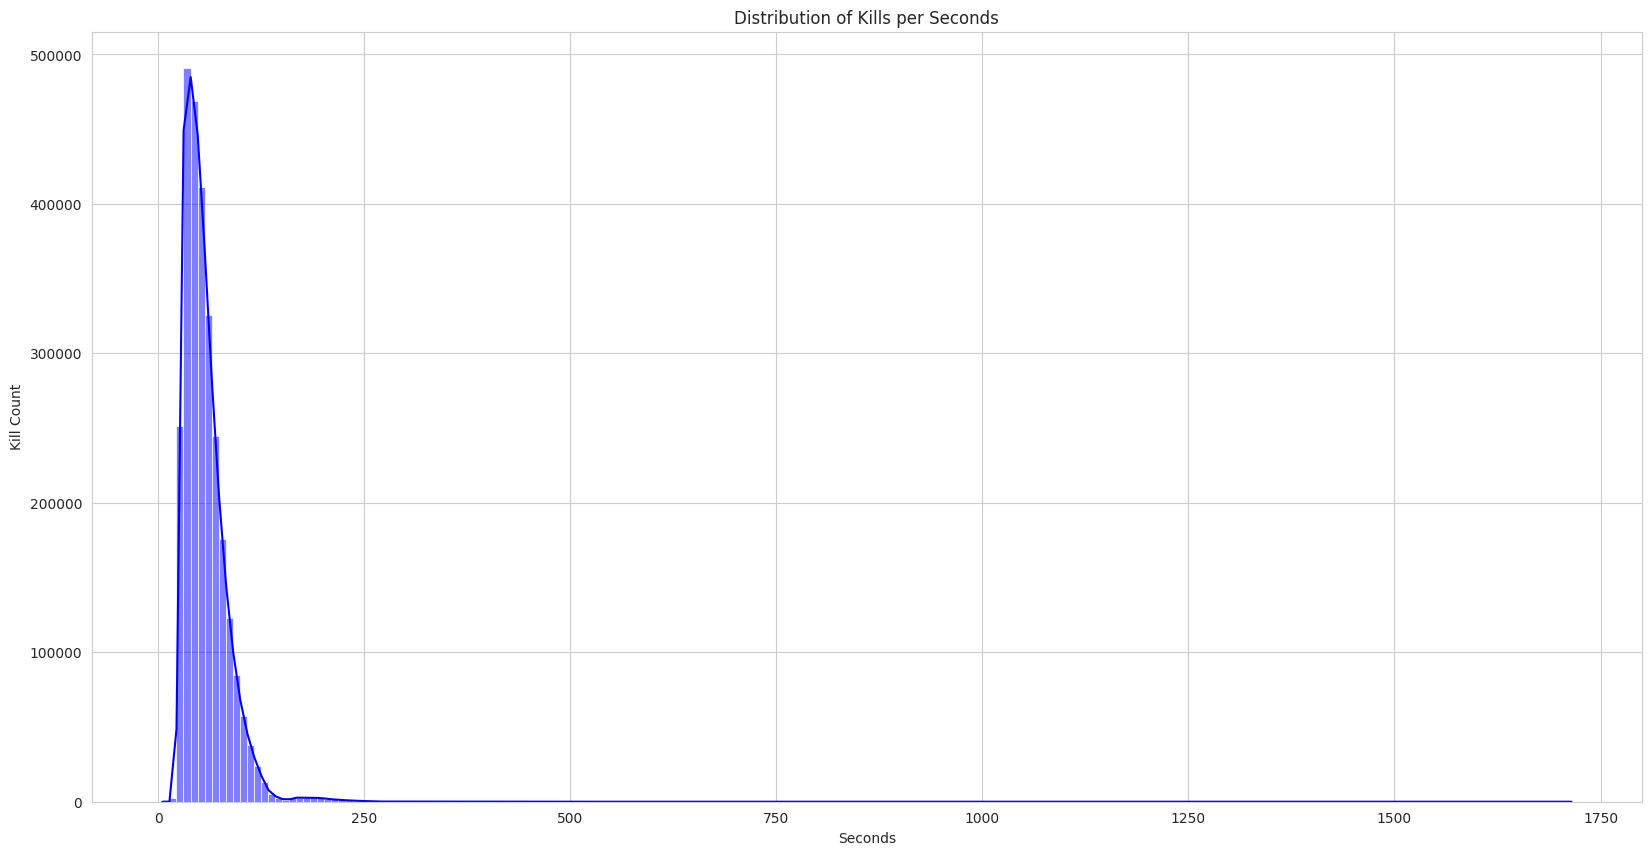

In [48]:
# Adjusting figure size
plt.figure(figsize=(20, 10))

# Creating the histogram
sns.histplot(kills_df['seconds'], bins=200, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of Kills per Seconds')
plt.xlabel('Seconds')
plt.ylabel('Kill Count')

# Displaying the plot
plt.show()


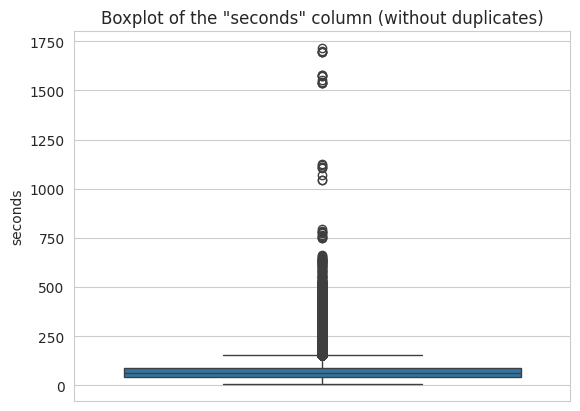

In [49]:
# Group the data by the 'seconds' column and calculate the occurrences count
counts = kills_df['seconds'].value_counts()

# Filter only unique values
unique_values = counts[counts == 1].index

# Filter the original DataFrame keeping only the unique values in the 'seconds' column
kills_df_unique = kills_df[kills_df['seconds'].isin(unique_values)]

# Now you can create the boxplot with the data without duplicates
sns.boxplot(y=kills_df_unique['seconds'])
plt.title('Boxplot of the "seconds" column (without duplicates)')
plt.show()

Como os outliers são bem distantes, testei retirar 1% dos dados, e plotei esse valor no grafico do hisotragema, so para ficar mais simples de observar o impacto na analise.

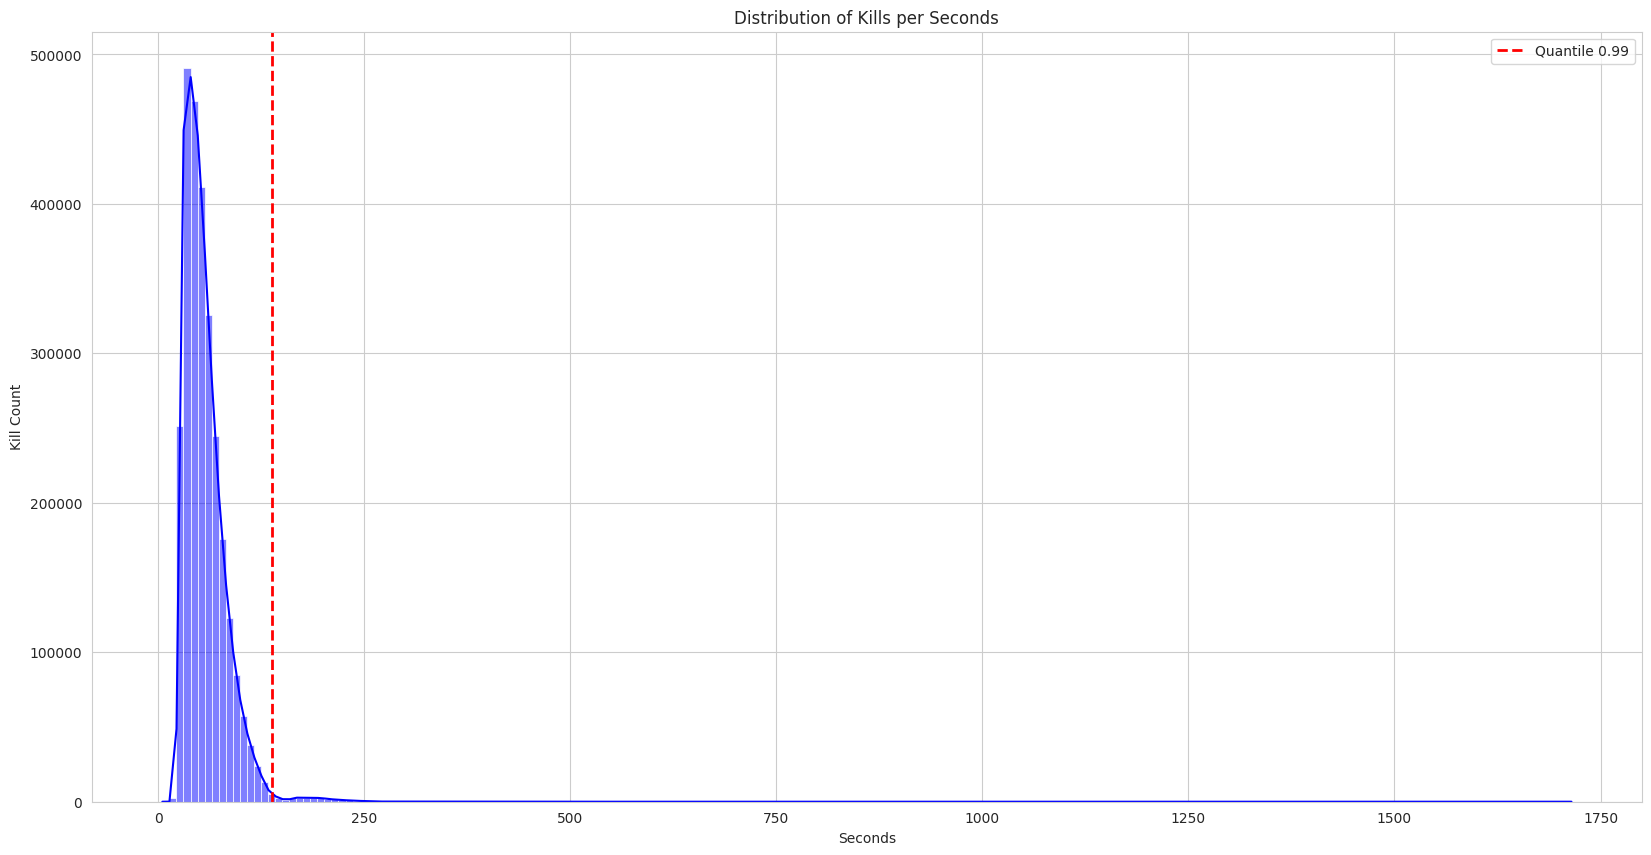

In [52]:
# Adjusting the figure size
plt.figure(figsize=(20, 10))

# Calculating the 0.99 quantile
quantile_value = kills_df['seconds'].quantile(0.99)

# Creating the histogram
sns.histplot(kills_df['seconds'], bins=200, kde=True, color='blue')

# Adding a vertical line to mark the 0.99 quantile
plt.axvline(x=quantile_value, color='red', linestyle='--', linewidth=2, label='Quantile 0.99')

# Adding titles and labels
plt.title('Distribution of Kills per Seconds')
plt.xlabel('Seconds')
plt.ylabel('Kill Count')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

O comportametne do histograma abaixo apresenta o comportamteto encontrado nas partidas profissioansi, onde occore mais mortes no inicio de uma partida, pela tentativa de invasão dos terroristas a um dos bomb side e uma diminuição dessas mortes no final do round, onde os jogadores escolhe guarda, para evitar perder as armas, diminuindo os gastos no round seguinte.

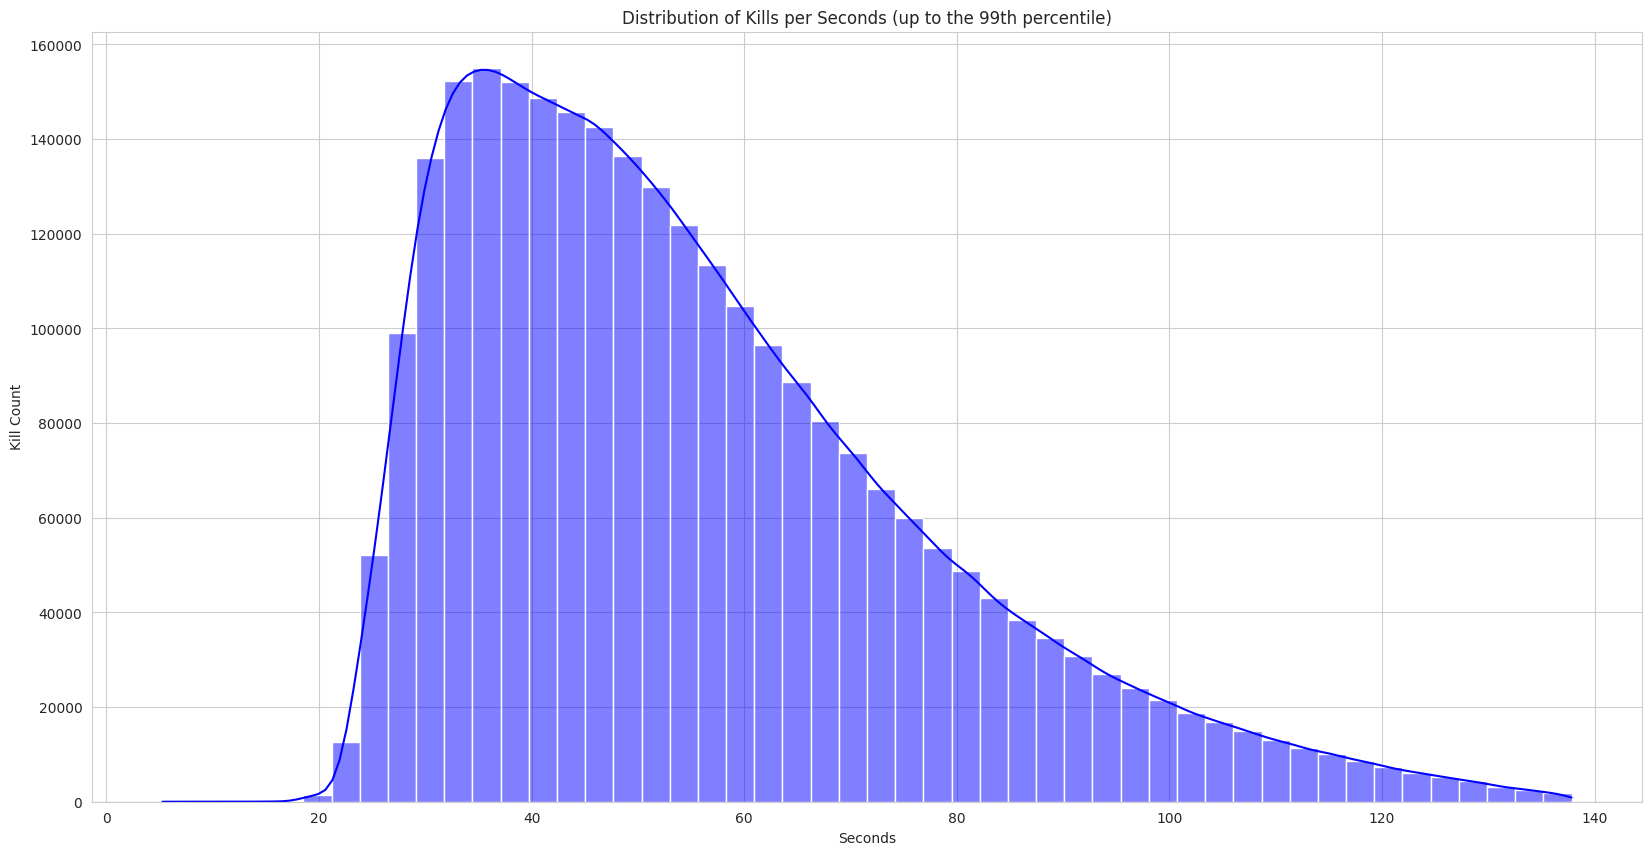

In [51]:
# Adjusting the figure size
plt.figure(figsize=(20, 10))

# Filtering the data for values within the range of 0 to 99%
filtered_data = kills_df[kills_df['seconds'] <= kills_df['seconds'].quantile(0.99)]

# Creating the histogram
sns.histplot(filtered_data['seconds'], bins=50, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of Kills per Seconds (up to the 99th percentile)')
plt.xlabel('Seconds')
plt.ylabel('Kill Count')

# Displaying the plot
plt.show()

o dados estão distrubiodos por tiro realizado, então o grafico abaixo mostra o hp retirado por tiro.

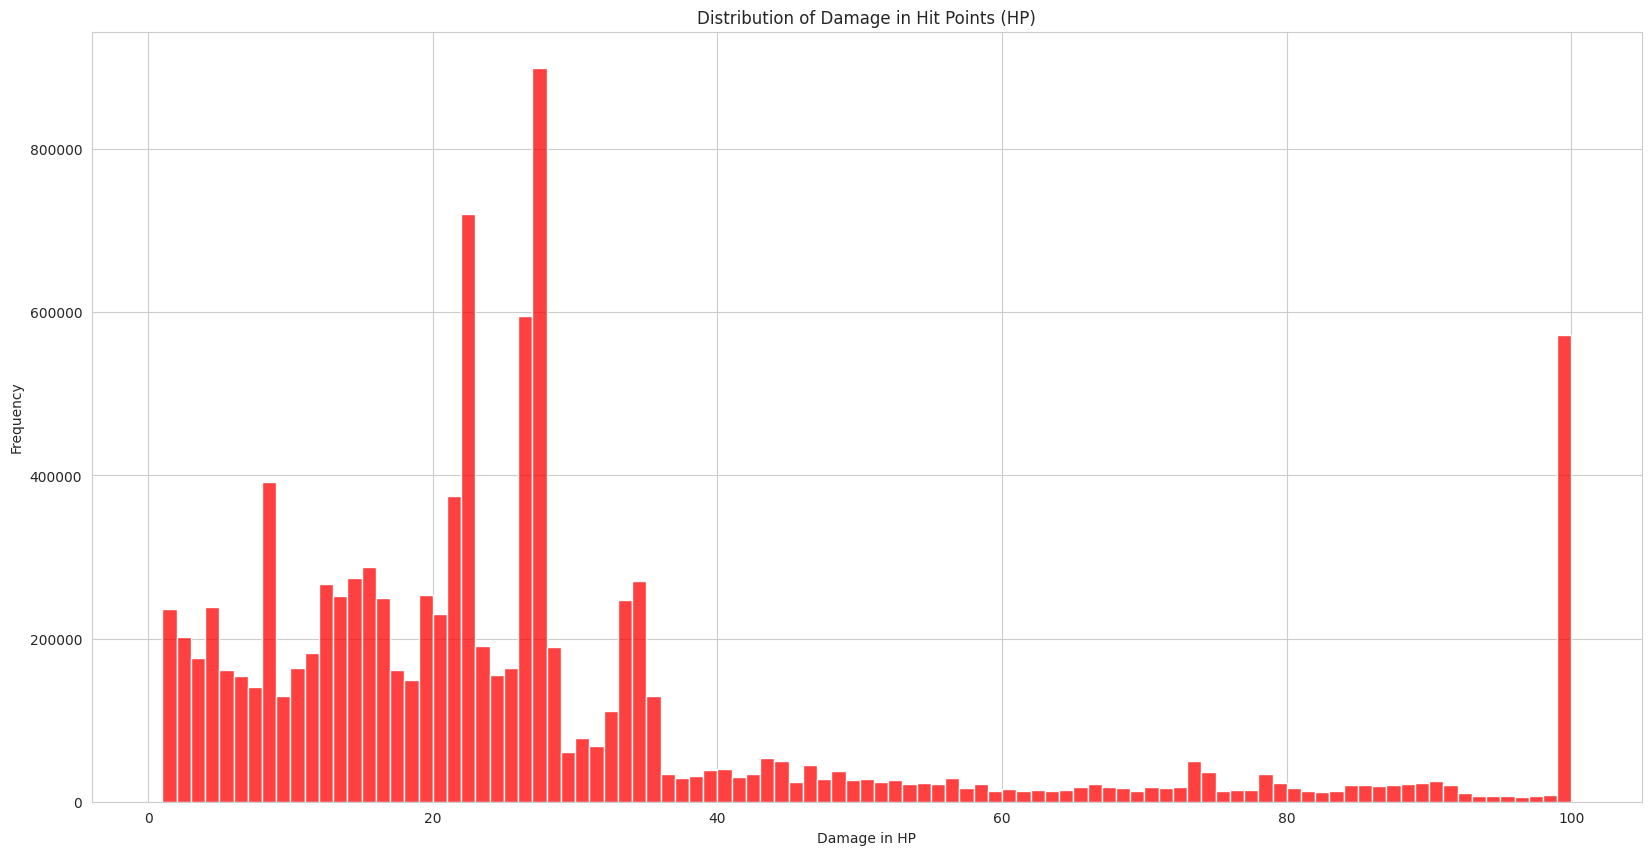

In [54]:
# Adjusting the figure size
plt.figure(figsize=(20, 10))

# Creating the histogram with a specific bin width
sns.histplot(damage_df['hp_dmg'], binwidth=1, color='red')

# Adding titles and labels
plt.title('Distribution of Damage in Hit Points (HP)')
plt.xlabel('Damage in HP')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


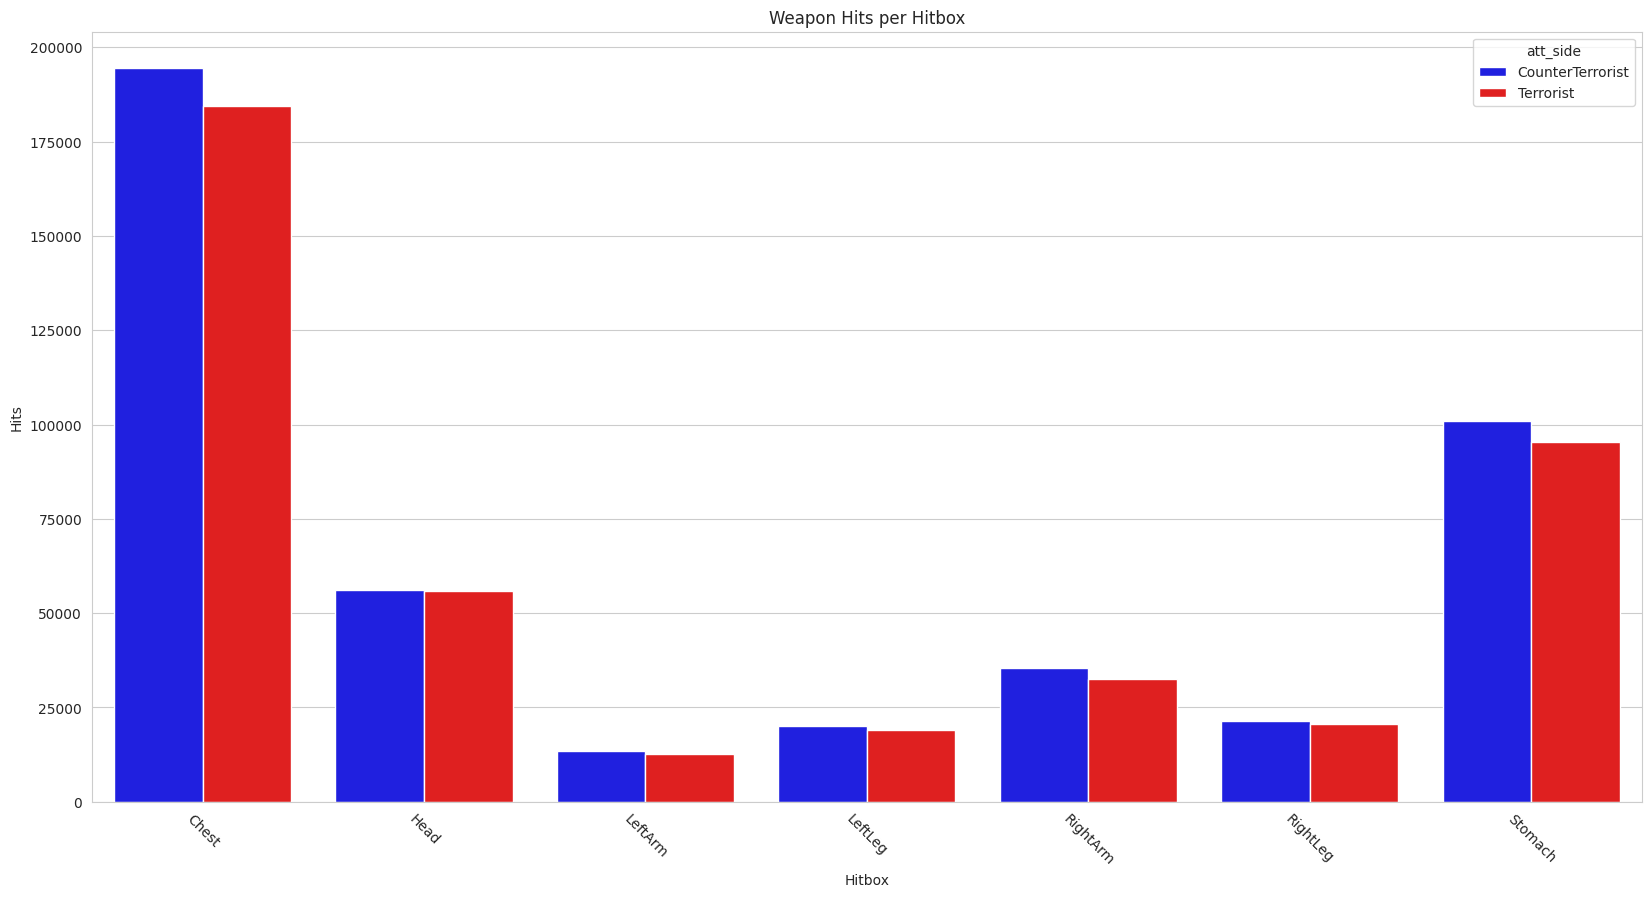

In [60]:
# Group by Hitbox and Gun, then summarize Hits
grouped_data = weapon_events_df.groupby(['hitbox', 'att_side']).size().reset_index(name='Hits')

# Filter Hits > 20 and Hitbox != 'Generic'
filtered_data = grouped_data[(grouped_data['Hits'] > 20) & (grouped_data['hitbox'] != 'Generic')]

# Plot
plt.figure(figsize=(20, 10))  # Adjusting the figure size
sns.barplot(data=filtered_data, x='hitbox', y='Hits', hue='att_side', palette={'CounterTerrorist': 'blue', 'Terrorist': 'red'})

# Set title and labels
plt.title('Weapon Hits per Hitbox')
plt.xlabel('Hitbox')
plt.ylabel('Hits')

# Rotate x-axis labels
plt.xticks(rotation=-45)

# Show the plot
plt.show()

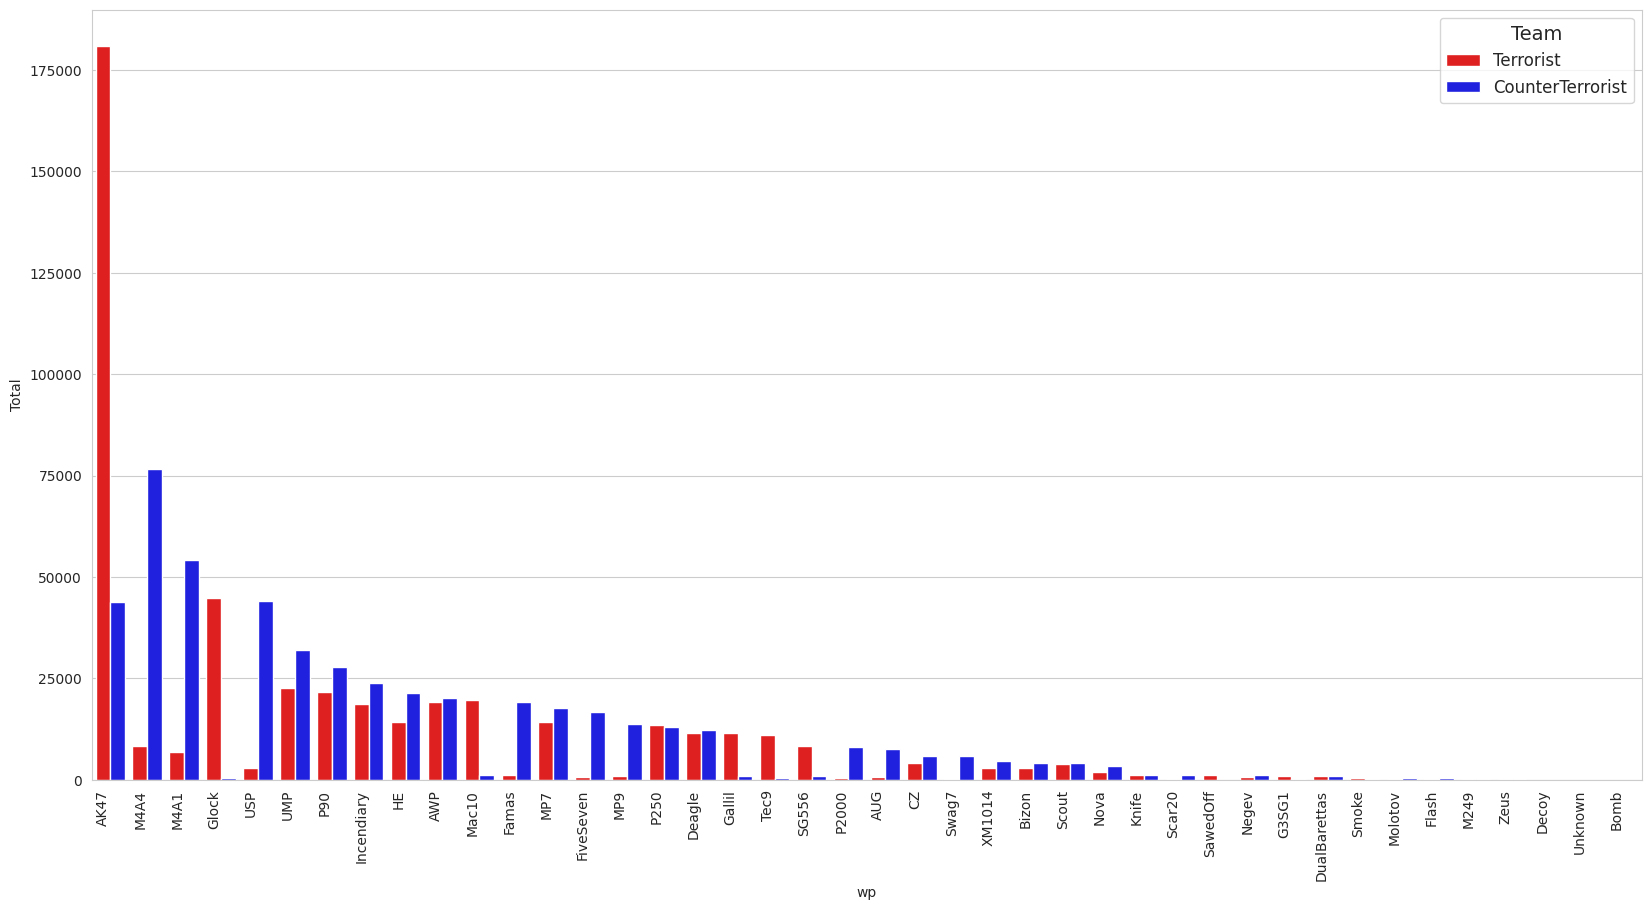

In [61]:
# Grouping and summarizing the data
weapon_counts = weapon_events_df.groupby(['wp', 'att_side']).size().reset_index(name='Total')

# Sorting by Total in descending order
weapon_counts = weapon_counts.sort_values(by='Total', ascending=False)

# Plotting the histogram with Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='wp', y='Total', hue='att_side', data=weapon_counts, palette=['red', 'blue'])

# Adjusting the angle of the x-axis text
plt.xticks(rotation=90, ha='right')

# Removing the Seaborn legend and adding manually
plt.legend(title='Team', title_fontsize='14', fontsize='12', loc='upper right')

# Displaying the plot
plt.show()


In [69]:
weapon_events_df['map'].unique()

array(['de_dust2', 'de_cache', 'de_inferno', 'de_mirage', 'de_cbble',
       'cs_agency', 'de_overpass', 'de_dust', 'de_train', 'de_austria',
       'de_nuke', 'cs_assault', 'de_thrill', 'de_blackgold',
       'cs_insertion', 'cs_office', 'de_shipped', 'de_vertigo',
       'de_canals', 'cs_italy', 'de_aztec'], dtype=object)

In [64]:
df_pistol = weapon_events_df[(weapon_events_df['round'].isin([1,16])) & (weapon_events_df['wp_type'].isin(['Pistol']))]

In [66]:
df_pistol[~df_pistol['bomb_site'].isnull()].groupby(['file', 'map', 'round', 'bomb_site'])['tick'] \
        .first().groupby(['map', 'bomb_site']).count().unstack('bomb_site')

bomb_site,A,B
map,,
de_austria,1.0,2.0
de_cache,158.0,133.0
de_canals,NaN,5.0
de_cbble,32.0,39.0
de_dust,1.0,1.0
de_dust2,186.0,134.0
de_inferno,105.0,79.0
de_mirage,180.0,263.0
de_nuke,8.0,11.0


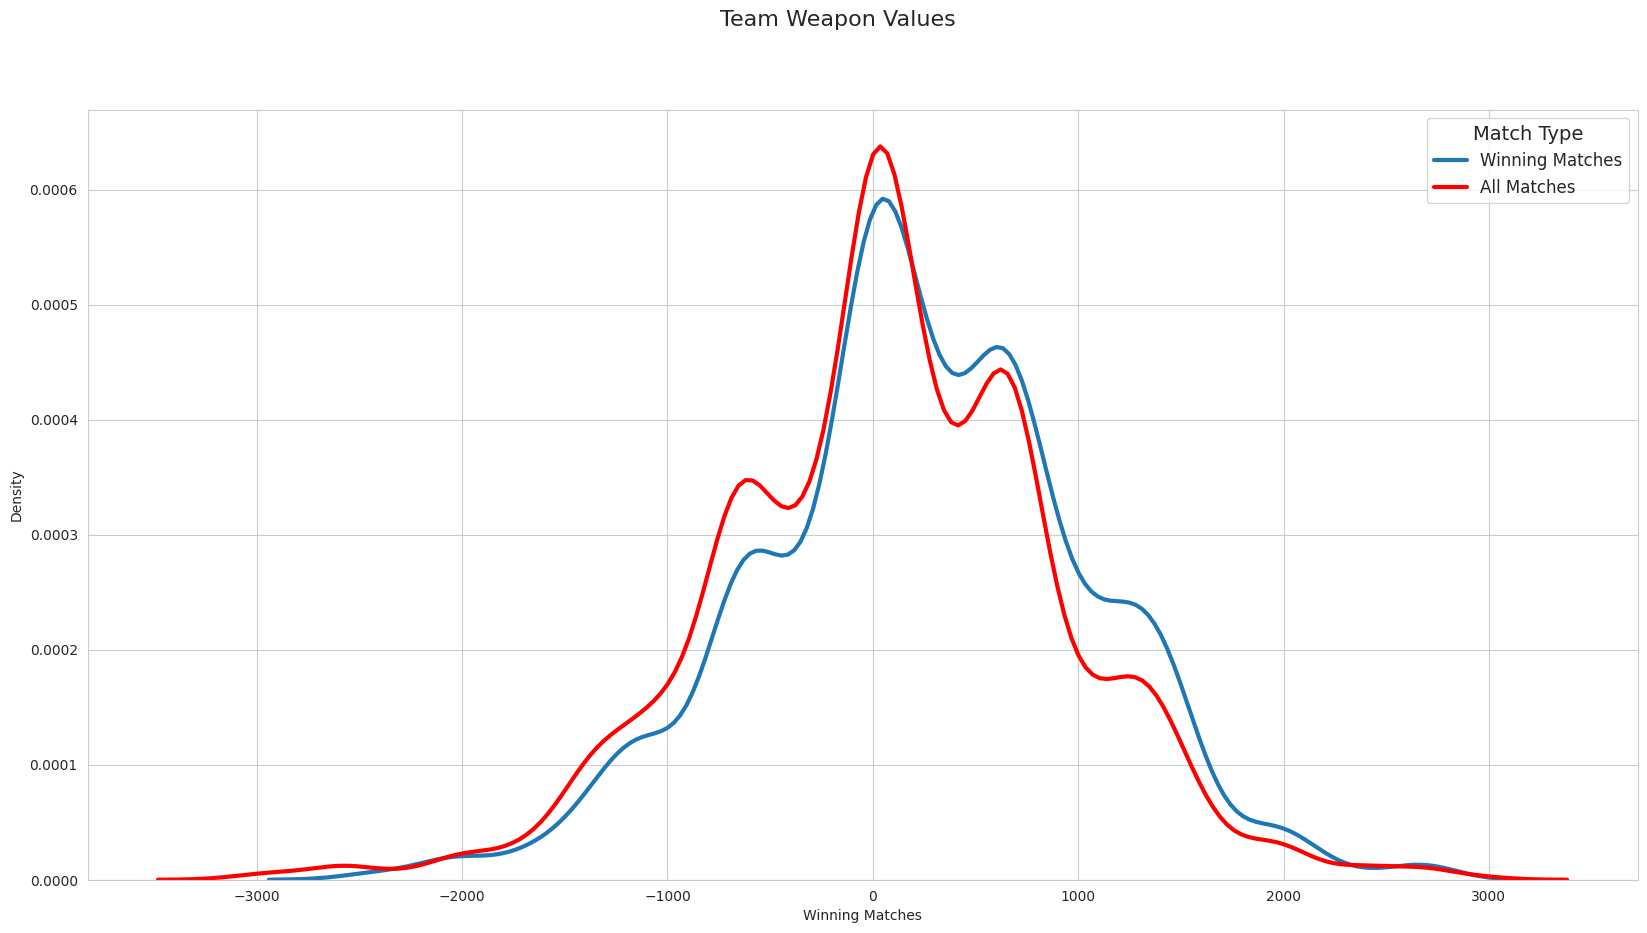

In [40]:
# Definindo o tamanho da figura
fig = plt.figure(figsize=(20, 10))

match_level_data = weapon_events_df.groupby('file').head()

# Plotando os KDE plots com nome e grossura das linhas, e atribuindo uma legenda
sns.kdeplot(match_level_data.query('winner_side == "CounterTerrorist"').pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('Winning Matches'), label='Winning Matches', linewidth=3)
sns.kdeplot(match_level_data.pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('All Matches'), label='All Matches', linewidth=3, color='red')

# Adicionando uma legenda
plt.legend(title='Match Type', title_fontsize='14', fontsize='12')

# Adicionando um título
plt.suptitle("Team Weapon Values", fontsize=16)

# Exibindo o gráfico
plt.show()


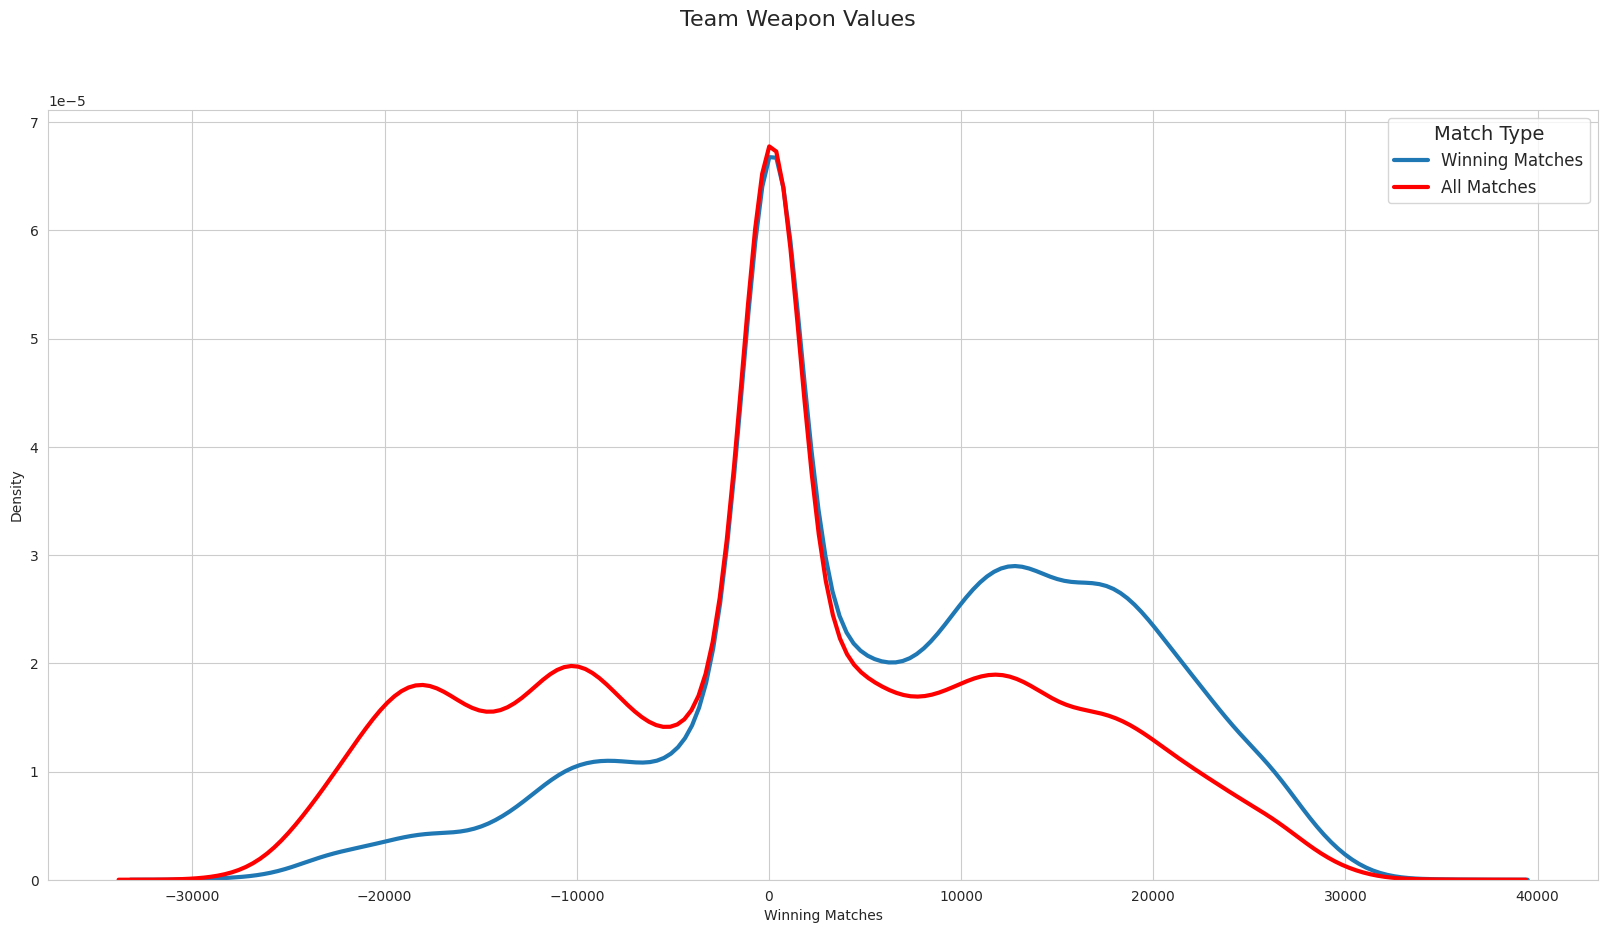

In [41]:
# Definindo o tamanho da figura
fig = plt.figure(figsize=(20, 10))

match_level_data = games_df.groupby('file').head()

# Plotando os KDE plots com nome e grossura das linhas, e atribuindo uma legenda
sns.kdeplot(match_level_data.query('winner_side == "CounterTerrorist"').pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('Winning Matches'), label='Winning Matches', linewidth=3)
sns.kdeplot(match_level_data.pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('All Matches'), label='All Matches', linewidth=3, color='red')

# Adicionando uma legenda
plt.legend(title='Match Type', title_fontsize='14', fontsize='12')

# Adicionando um título
plt.suptitle("Team Weapon Values", fontsize=16)

# Exibindo o gráfico
plt.show()
